<H1>Quickdraw images simplified used as data</H1>

In [2]:
import ndjson
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm as tqdm
import os
import json

In [3]:
print(os.getcwd())

/home/harshit/SketchedArt/cnn_model


In [9]:
file_path='../datasets/data/quickdraw_simplified/angel.ndjson'

with open(file_path) as f:
    reader=ndjson.reader(f)
    row1=next(reader)
print(json.dumps(row1,indent=4))

{
    "word": "angel",
    "countrycode": "US",
    "timestamp": "2017-03-13 15:30:54.82243 UTC",
    "recognized": false,
    "key_id": "5864802511486976",
    "drawing": [
        [
            [
                93,
                103,
                104,
                139,
                140,
                149,
                84
            ],
            [
                174,
                111,
                51,
                54,
                97,
                171,
                173
            ]
        ],
        [
            [
                103,
                81,
                58,
                50,
                42,
                20,
                7,
                0,
                1,
                10,
                23,
                121,
                124
            ],
            [
                73,
                61,
                32,
                27,
                28,
                42,
                60,
         

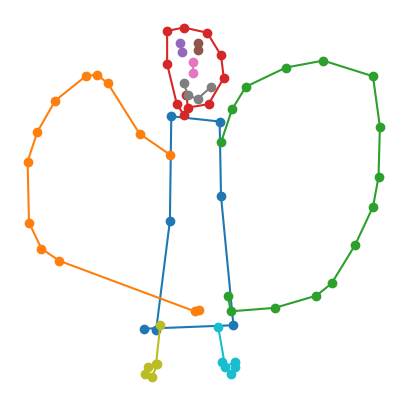

In [5]:
drawing=row1["drawing"]
plt.figure(figsize=(5,5))
for s in drawing:
    x,y=s
    plt.plot(x,y,marker='o')
plt.gca().invert_yaxis()
plt.axis('off')
plt.show()

In [ ]:
import random
from PIL import Image, ImageDraw

INPUT_DIR = "../datasets/data/quickdraw_simplified"  
OUTPUT_DIR = "../datasets/data/quickdraw_small"
IMG_SIZE = 128         
TRAIN_RATIO = 0.8      
MAX_IMAGES_PER_CAT = 2000  
CATEGORIES = [
    "cat", "dog", "apple", "car", "fish",
    "tree", "house", "bicycle", "chair", "clock"
]

def render_drawing(strokes, img_size=128, original_size=256):
    """Render strokes to a scaled image."""
    img = Image.new("L", (img_size, img_size), 255)
    draw = ImageDraw.Draw(img)
    scale = img_size / original_size  

    for stroke in strokes:
        points = [(x * scale, y * scale) for x, y in zip(stroke[0], stroke[1])]
        draw.line(points, fill=0, width=2)
    return img


def process_category(category):
    filepath = os.path.join(INPUT_DIR, f"{category}.ndjson")
    if not os.path.exists(filepath):
        print(f"⚠️ No file found for {category}")
        return
    
    with open(filepath) as f:
        data = ndjson.load(f)

    random.shuffle(data)
    data = data[:MAX_IMAGES_PER_CAT]

    split_index = int(len(data) * TRAIN_RATIO)
    train_data = data[:split_index]
    test_data = data[split_index:]

    train_dir = os.path.join(OUTPUT_DIR, "train", category)
    test_dir = os.path.join(OUTPUT_DIR, "test", category)
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    for idx, item in enumerate(train_data):
        img = render_drawing(item["drawing"], IMG_SIZE)
        img.save(os.path.join(train_dir, f"{idx}.png"))

    for idx, item in enumerate(test_data):
        img = render_drawing(item["drawing"], IMG_SIZE)
        img.save(os.path.join(test_dir, f"{idx}.png"))

    print(f"Processed {category}: {len(train_data)} train, {len(test_data)} test")

os.makedirs(os.path.join(OUTPUT_DIR, "train"), exist_ok=True)
os.makedirs(os.path.join(OUTPUT_DIR, "test"), exist_ok=True)

for cat in CATEGORIES:
    process_category(cat)

print("\n🎯 Dataset ready at:", OUTPUT_DIR)


✅ Processed cat: 1600 train, 400 test
✅ Processed dog: 1600 train, 400 test
✅ Processed apple: 1600 train, 400 test
✅ Processed car: 1600 train, 400 test
✅ Processed fish: 1600 train, 400 test
✅ Processed tree: 1600 train, 400 test
✅ Processed house: 1600 train, 400 test
✅ Processed bicycle: 1600 train, 400 test
✅ Processed chair: 1600 train, 400 test
✅ Processed clock: 1600 train, 400 test

🎯 Dataset ready at: ../datasets/data/quickdraw_small


In [ ]:
from PIL import Image
img = Image.open('../datasets/data/quickdraw_small/train/bicycle/1.png')
img_np = np.array(img)
print(img_np.shape)

(128, 128)


In [12]:
img_np1 = np.expand_dims(img_np, axis=-1)
print(img_np1.shape) 

(128, 128, 1)
